# HW 2 Part 2: PCA and Clustering on the Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided clean bank marketing dataset before encoding and scaling (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). Complete all the [LP] questions to receive a "low pass" grade on the homework. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

[LP 1] Import the provided clean data file, your preprocessed dataset from HW1, or clean the dataset here. Extract the following columns:

1. duration: all entries must be non-negative
2. campaign
3. pdays
4. previous

The set of values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices if you are preprocessing the dataset again here OR comment that you are using your preprocessed dataset from HW1. 

Next, remove outliers using [z-score](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html). Specifically, you are advised to remove values that have a z-score below -3 or above +3. 

Using the clean bank data provided, since all 4 columns are numeric, no need for encoding. For scaling, using StandardScaler to standardize the distribution of all features to have the same scale. This will allow better performance for KMeans clustering algorithm which relies on distance. Then applying z-score on these columns to remove outliers below -3 and above +3. 

In [2]:
# Your code for LP1 goes here
# Feel free to add cells below this for LP1
import pandas as pd

path = "../Part2/bank-hw2-clean.csv"
bank_df = pd.read_csv(path, header=0)

In [12]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2251 non-null   float64
 1   job        2251 non-null   object 
 2   marital    2251 non-null   object 
 3   education  2251 non-null   object 
 4   default    2251 non-null   object 
 5   balance    2251 non-null   int64  
 6   housing    2251 non-null   object 
 7   loan       2251 non-null   object 
 8   contact    2251 non-null   object 
 9   day        2251 non-null   int64  
 10  month      2251 non-null   object 
 11  duration   2251 non-null   float64
 12  campaign   2251 non-null   float64
 13  pdays      2251 non-null   float64
 14  previous   2251 non-null   int64  
 15  poutcome   2251 non-null   object 
 16  y          2251 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 299.1+ KB


In [3]:
bank_select = ['duration', 'campaign', 'pdays', 'previous']
bank_new = bank_df[bank_select]
bank_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  2251 non-null   float64
 1   campaign  2251 non-null   float64
 2   pdays     2251 non-null   float64
 3   previous  2251 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 70.5 KB


In [4]:
(bank_new['duration'].values < 0).any()

False

In [5]:
bank_new.isna().sum()

duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [14]:
bank_new['duration'].value_counts()

114.0     16
103.0     15
125.0     13
71.0      13
90.0      13
          ..
1730.0     1
850.0      1
703.0      1
864.0      1
652.0      1
Name: duration, Length: 684, dtype: int64

In [13]:
bank_new['campaign'].value_counts()

1.000000     858
2.000000     624
3.000000     284
4.000000     173
5.000000      97
6.000000      56
7.000000      46
9.000000      21
8.000000      21
10.000000     12
12.000000      8
16.000000      8
13.000000      6
14.000000      6
11.000000      6
19.000000      5
21.000000      4
17.000000      4
22.000000      4
2.760783       2
20.000000      2
29.000000      1
18.000000      1
50.000000      1
15.000000      1
Name: campaign, dtype: int64

In [15]:
bank_new['pdays'].value_counts()

-1.0      1828
 182.0      13
 349.0       9
 91.0        9
 92.0        7
          ... 
 236.0       1
 417.0       1
 82.0        1
 211.0       1
 274.0       1
Name: pdays, Length: 219, dtype: int64

In [16]:
bank_new['previous'].value_counts()

0     1830
1      150
2      109
3       57
4       36
5       15
6       13
7       11
10       6
11       5
8        3
13       2
12       2
19       2
9        2
29       1
14       1
22       1
16       1
37       1
15       1
17       1
23       1
Name: previous, dtype: int64

[[-0.56143749  2.09613546 -0.41796785 -0.28987681]
 [-0.31159222  4.44786441 -0.41796785 -0.28987681]
 [ 0.44540166 -0.59155476  1.43626408  1.18085055]
 ...
 [-0.28921801 -0.25559348 -0.41796785 -0.28987681]
 [-0.74416015 -0.59155476 -0.41796785 -0.28987681]
 [-0.63228913 -0.59155476  0.50914812  4.12230528]]


{'whiskers': [<matplotlib.lines.Line2D at 0x1e9cafbbf10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9cafcc490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9cafbbc70>,
 'medians': [<matplotlib.lines.Line2D at 0x1e9caf6ae80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e9cafcc880>,
 'means': []}

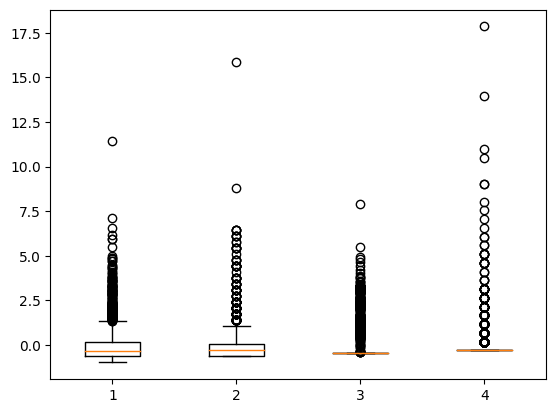

In [111]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(bank_new)
print(scaled_data)
plt.boxplot(scaled_data)

C:\Users\Jaswa\AppData\Local\Temp\ipykernel_22572\1999860377.py:1: RuntimeWarning: divide by zero encountered in log2
  plt.boxplot(np.log2(scaled_data))
C:\Users\Jaswa\AppData\Local\Temp\ipykernel_22572\1999860377.py:1: RuntimeWarning: invalid value encountered in log2
  plt.boxplot(np.log2(scaled_data))


{'whiskers': [<matplotlib.lines.Line2D at 0x1e9d33751c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9d3375700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9cb2f7280>,
 'medians': [<matplotlib.lines.Line2D at 0x1e9d3375c40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e9d3375ee0>,
 'means': []}

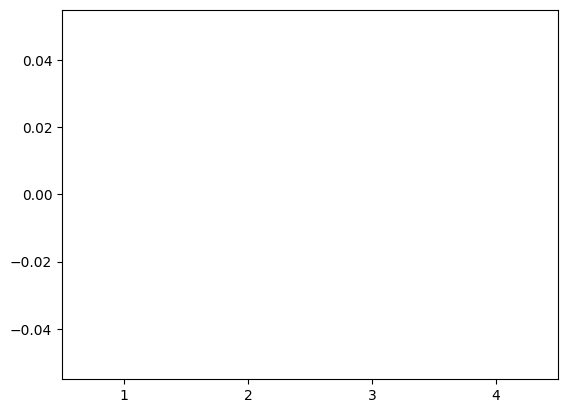

In [119]:
plt.boxplot(np.log2(scaled_data))

In [113]:
# using scipy stats to compute zscore
import scipy.stats as stats

# grab the zscore and apply numpy absolute value for capping.
zscore = np.abs(stats.zscore(scaled_data))

#cap outliers from scaled data for each array 
# where zscore is above 3 and below -3.
clean_data = scaled_data[(zscore<3).all(axis=1)]

#create a df without outliers
clean_df = pd.DataFrame(clean_data)
#rename columns
clean_df.columns = ['duration', 'campaign', 'pdays', 'previous']
#print shape of new clean dataset
clean_df.shape


(2020, 4)

In [114]:
#check to see if any values in clean dataset still contain outliers
(clean_df.values < -3).any()

False

In [115]:
#check to see if any values in clean dataset still contain outliers

(clean_df.values > 3).any()

False

[LP 2] 
1. Perform Principal Component Analysis (PCA) on the filtered dataset and extract the top three principal components. Perform the necessary preprocessing steps for the same.
2. Plot the top two principal components in a graph using appropriate labels on the x and y axes.


In [116]:
# Your code for LP2 goes here
# Feel free to add cells below this for LP2

from sklearn import decomposition

pca = decomposition.PCA(n_components = 3)

bank_pca = pca.fit_transform(clean_df)

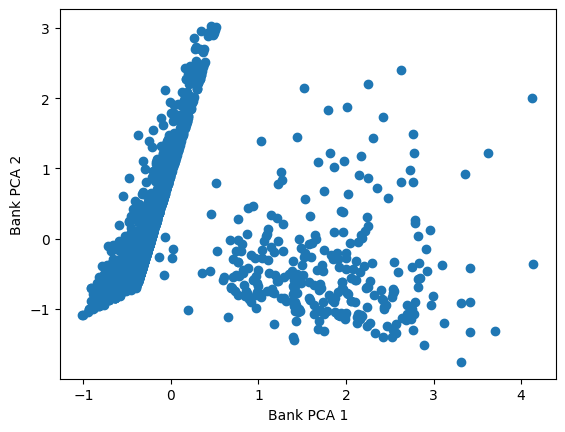

In [117]:
#plot
import matplotlib.pyplot as plt

plt.scatter(bank_pca[:,0], bank_pca[:,1])
plt.xlabel("Bank PCA 1")
plt.ylabel("Bank PCA 2")
plt.show()

[HP 1]
Did we lose information by picking only the top three principal components? How much information from the four columns in the filtered components are captured in the the two top principal components? Explain your answer briefly.

In [ ]:
# Your code for HP1 goes here
# Feel free to add cells below this for HP1

<your answer for HP 1 goes here>

[LP 3] Perform K-means clustering on the filtered dataset (before PCA) with k = 3 and plot the results using the first two principal components (after PCA). You may look at the class example for reference.

In [138]:
# Your code for LP3 goes here
# Feel free to add cells below this for LP3
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=3)

before = kmeans.fit_predict(clean_df)

after_pca_df = pd.DataFrame(bank_pca)
after_pca_df['result'] = before
after_pca_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2020 non-null   float64
 1   1       2020 non-null   float64
 2   2       2020 non-null   float64
 3   result  2020 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 55.4 KB


In [139]:
after_pca_df['result'].value_counts()

0    1478
1     298
2     244
Name: result, dtype: int64

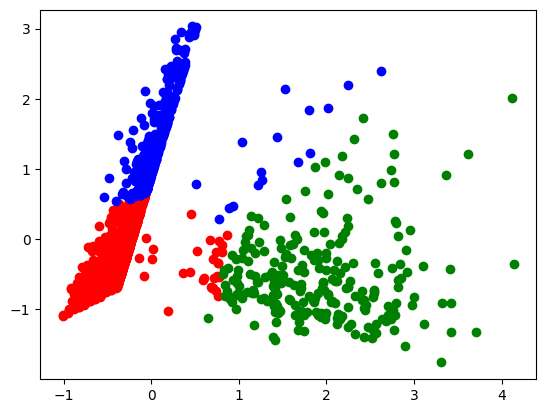

In [140]:
import matplotlib.pyplot as plt

temp1 = after_pca_df[after_pca_df['result'] == 0]
temp2 = after_pca_df[after_pca_df['result'] == 1]
temp3 = after_pca_df[after_pca_df['result'] == 2]
temp4 = after_pca_df[after_pca_df['result'] == 3]
plt.scatter(temp1[0], temp1[1], color = 'r')
plt.scatter(temp2[0], temp2[1], color = 'b')
plt.scatter(temp3[0], temp3[1], color = 'g')
plt.scatter(temp4[0], temp4[1], color = 'y')
plt.show()


[HP 2] Use the elbow method to select the best value of k for this dataset and plot your results. What value of k is the appropriate number of clusters for this problem?

In [ ]:
# Your code for HP2 goes here
# Feel free to add cells below this for HP2

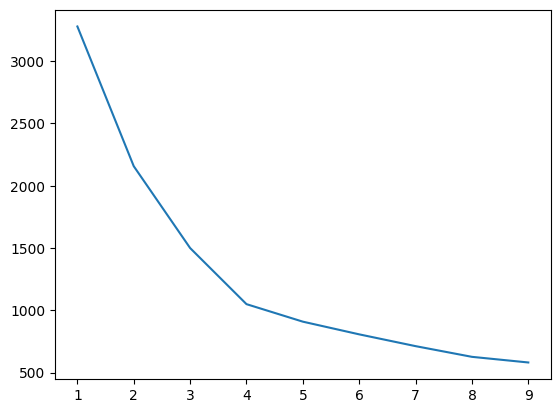

In [142]:
errors = []
ks = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  pred = km.fit_predict(clean_df)
  error = km.inertia_
  ks.append(k)
  errors.append(error)

plt.plot(ks, errors)

K = 4 is the best value for the number of clusters as shown in the plot above where error rate drops the least after k = 4. 

# References
Include ALL your references here. 
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
2. https://www.statology.org/z-score-python/
3. https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
4. https://colab.research.google.com/drive/1ZRSUa9rXu3jiYyNwm9yXw-quW7gAVuHz?usp=sharing

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository